In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics

In [10]:
df = pd.read_excel('./data/gameScores_2015-2024.xlsx')
df

,date,visitor,home,visitor_points,home_points
0,2015-10-02,Denver Nuggets,LA Clippers,96,103
1,2015-10-03,Charlotte Hornets,Orlando Magic,106,100
2,2015-10-03,New Orleans Pelicans,Indiana Pacers,110,105
3,2015-10-04,Utah Jazz,Los Angeles Lakers,90,71
4,2015-10-04,Charlotte Hornets,Miami Heat,90,77
...,...,...,...,...,...
13153,2024-11-04,Portland Trail Blazers,New Orleans Pelicans,118,100
13154,2024-11-04,New York Knicks,Houston Rockets,97,109
13155,2024-11-04,Memphis Grizzlies,Brooklyn Nets,104,106
13156,2024-11-04,Utah Jazz,Chicago Bulls,135,126


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            13158 non-null  object
 1   visitor         13158 non-null  object
 2   home            13158 non-null  object
 3   visitor_points  13158 non-null  int64 
 4   home_points     13158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 514.1+ KB


In [31]:
# Take games between 2019 and current year
start_year = 2018
current_year = dt.datetime.now().year

# Convert to datetime data type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtered the dataframe for games between start year and current year
filtered_df = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= current_year)]

filtered_df.reset_index(drop=True)

C:\Users\User\AppData\Local\Temp\ipykernel_27840\2196270015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


,date,visitor,home,visitor_points,home_points
0,2018-01-01,Portland Trail Blazers,Chicago Bulls,124,120
1,2018-01-01,Orlando Magic,Brooklyn Nets,95,98
2,2018-01-01,Los Angeles Lakers,Minnesota Timberwolves,96,114
3,2018-01-01,Milwaukee Bucks,Toronto Raptors,127,131
4,2018-01-02,Portland Trail Blazers,Cleveland Cavaliers,110,127
...,...,...,...,...,...
9644,2024-11-04,Portland Trail Blazers,New Orleans Pelicans,118,100
9645,2024-11-04,New York Knicks,Houston Rockets,97,109
9646,2024-11-04,Memphis Grizzlies,Brooklyn Nets,104,106
9647,2024-11-04,Utah Jazz,Chicago Bulls,135,126


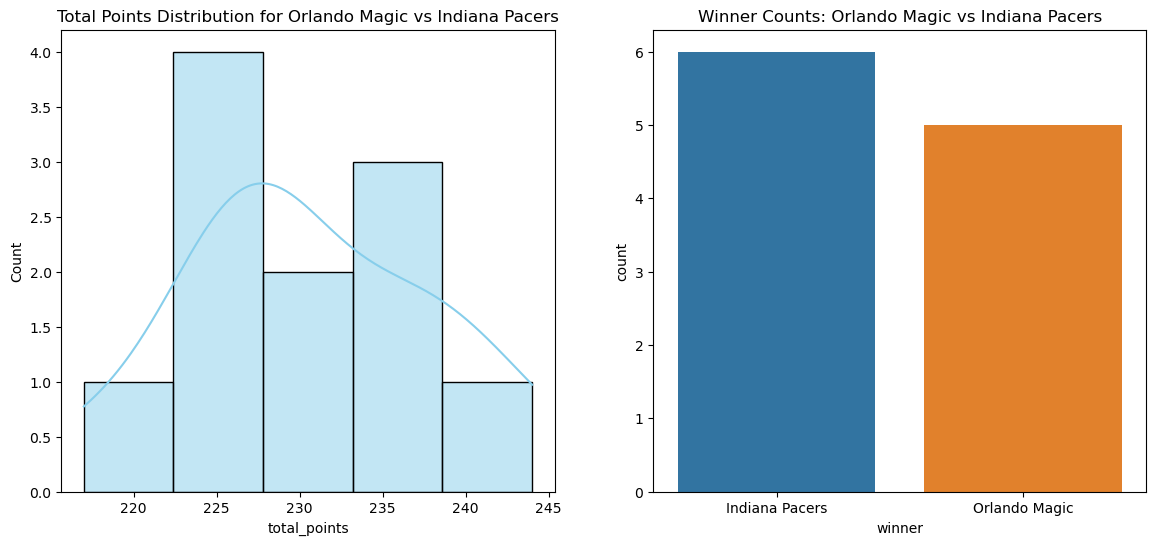

Statistics of Orlando Magic vs Indiana Pacers


Mean: 230.54545454545453
Standard Deviation: 7.6467461885907575
------------------------------------
z-score for 224.5: -0.79
z-score for 225.5: -0.66
z-score for 226.5: -0.53
z-score for 227.5: -0.40
z-score for 228.5: -0.27
z-score for 229.5: -0.14
z-score for 230.5: -0.01
z-score for 231.5: 0.12
z-score for 232.5: 0.26
z-score for 233.5: 0.39
z-score for 234.5: 0.52
z-score for 235.5: 0.65
z-score for 236.5: 0.78
z-score for 237.5: 0.91
z-score for 238.5: 1.04


,date,visitor,home,visitor_points,home_points,total_points,winner
3688,2018-01-27,Orlando Magic,Indiana Pacers,112,114,226,Indiana Pacers
5405,2019-03-02,Orlando Magic,Indiana Pacers,117,112,229,Orlando Magic
5615,2019-03-30,Orlando Magic,Indiana Pacers,121,116,237,Orlando Magic
6196,2019-11-23,Orlando Magic,Indiana Pacers,106,111,217,Indiana Pacers
7056,2020-08-04,Orlando Magic,Indiana Pacers,109,120,229,Indiana Pacers
7504,2021-01-22,Orlando Magic,Indiana Pacers,118,120,238,Indiana Pacers
9500,2022-02-02,Orlando Magic,Indiana Pacers,119,118,237,Orlando Magic
10498,2022-11-19,Orlando Magic,Indiana Pacers,113,114,227,Indiana Pacers
10516,2022-11-21,Orlando Magic,Indiana Pacers,102,123,225,Indiana Pacers
11846,2023-11-19,Orlando Magic,Indiana Pacers,128,116,244,Orlando Magic


In [29]:
def possible_outcome(dataframe, away_team, home_team, first_line): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], hue='winner')
    axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game['total_points'].mean()
    standard_deviation = matchup_game['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(15)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('\n')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')

    # print('------------------------------------')

    # Find percentage of games between specified range
    # total_games = len(matchup_game)
    # games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
    # percentage = (len(games_in_range) / total_games) * 100
    # print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
    # print('------------------------------------')
    
    return matchup_game

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))


possible_outcome(filtered_df, away_team, home_team, first_line)